In [10]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/clean_dataset.csv', index_col=0)

df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## Feature presentation

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines. 

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature. 

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities. 

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities. 

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time. 

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities. 

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy. 

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours. 

10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date. 

11) Price: Target variable stores information of the ticket price.

In [4]:
df.shape

(300153, 11)

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  str    
 1   flight            300153 non-null  str    
 2   source_city       300153 non-null  str    
 3   departure_time    300153 non-null  str    
 4   stops             300153 non-null  str    
 5   arrival_time      300153 non-null  str    
 6   destination_city  300153 non-null  str    
 7   class             300153 non-null  str    
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), str(8)
memory usage: 25.2 MB


In [6]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [7]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [8]:
#sns.pairplot(df)

### analysing column : airline ###


airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

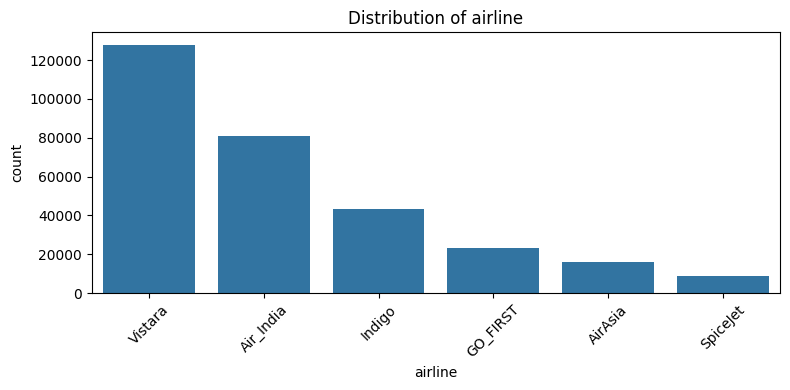

### analysing column : flight ###


flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
6E-6474       1
G8-405        1
6E-543        1
SG-1058       1
6E-3211       1
Name: count, Length: 1561, dtype: int64

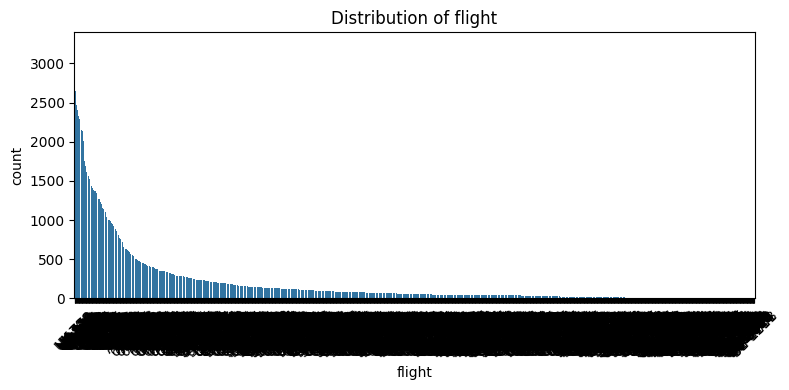

### analysing column : source_city ###


source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

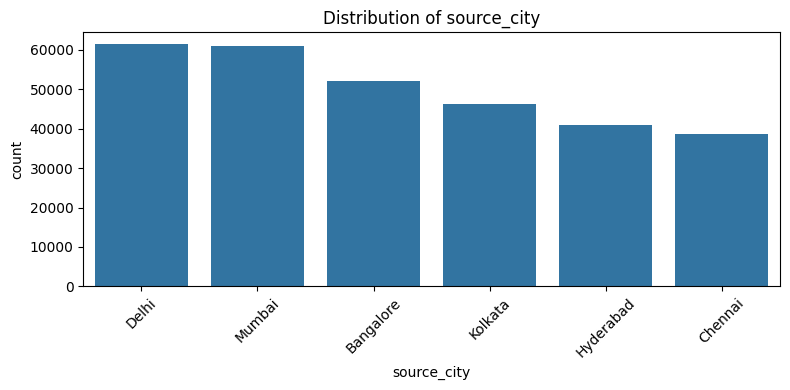

### analysing column : departure_time ###


departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

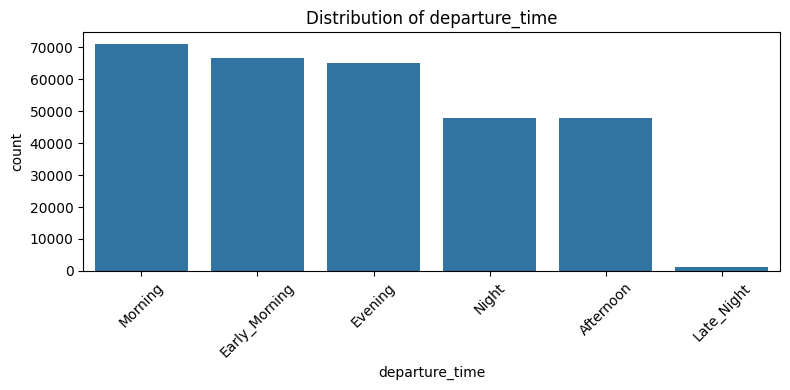

### analysing column : stops ###


stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

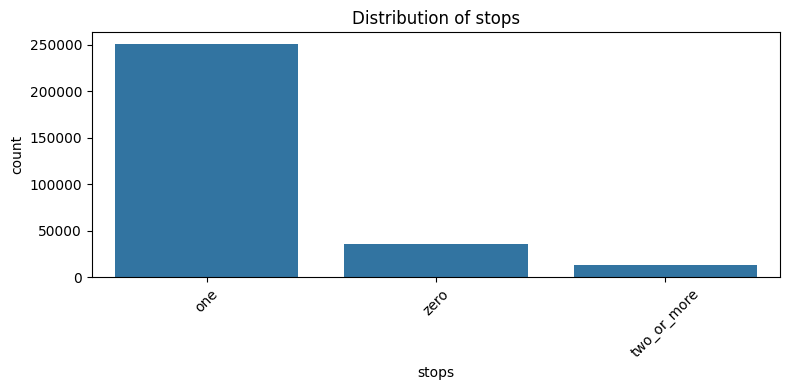

### analysing column : arrival_time ###


arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

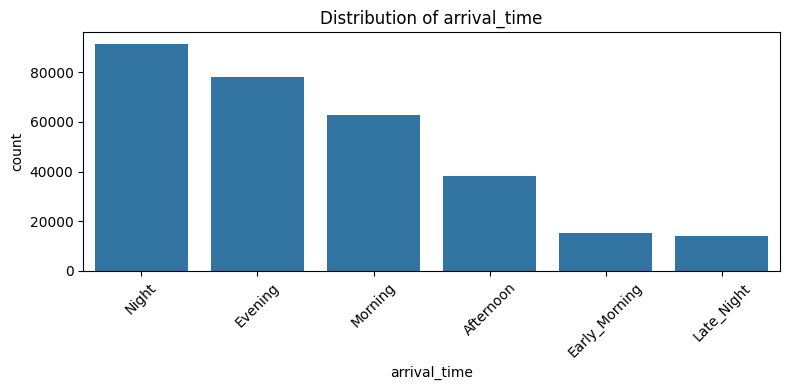

### analysing column : destination_city ###


destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

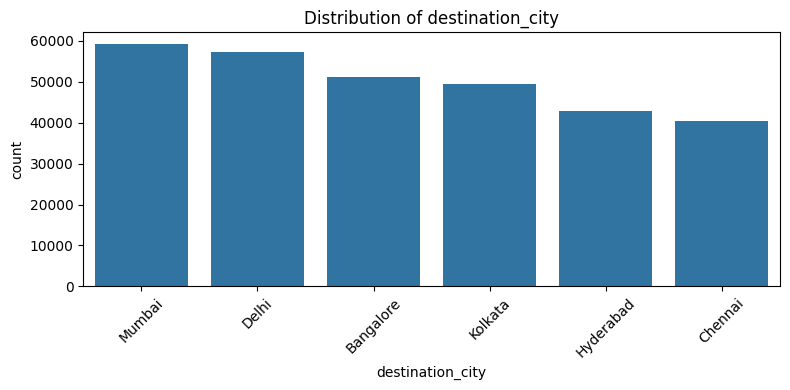

### analysing column : class ###


class
Economy     206666
Business     93487
Name: count, dtype: int64

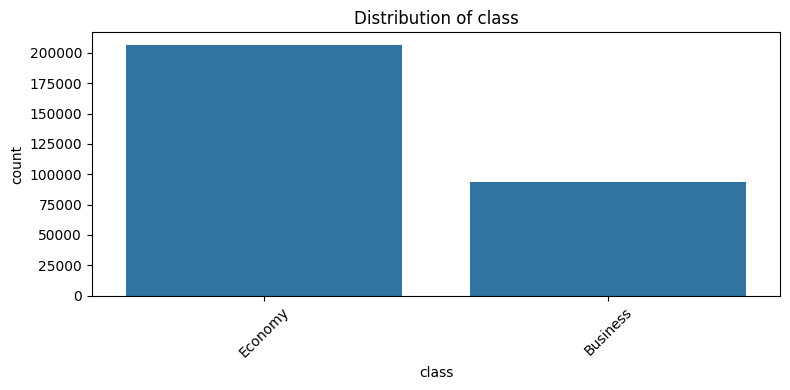

### analysing column : duration ###


duration
2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
41.08       1
35.67       1
47.08       1
44.50       1
41.50       1
Name: count, Length: 476, dtype: int64

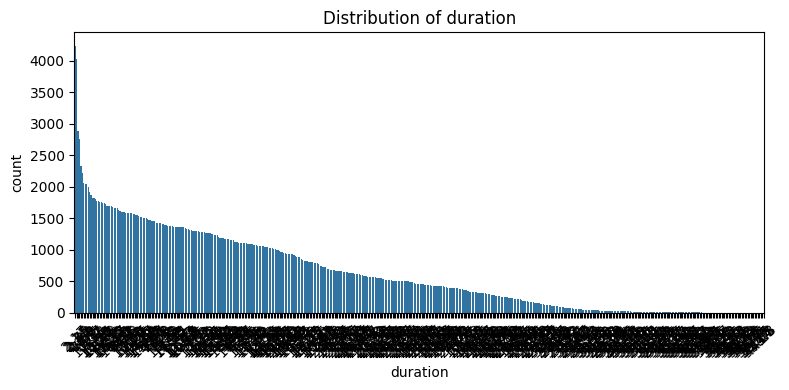

### analysing column : days_left ###


days_left
25    6633
18    6602
39    6593
32    6585
26    6573
24    6542
19    6537
31    6534
33    6532
40    6531
41    6525
28    6522
38    6512
20    6502
30    6501
42    6497
22    6494
36    6490
21    6479
37    6476
43    6472
44    6436
17    6419
11    6417
34    6412
13    6404
23    6401
29    6397
12    6381
27    6360
14    6349
15    6340
45    6314
35    6291
16    6272
46    6160
49    6154
48    6078
47    6069
10    5822
8     5767
6     5740
7     5703
9     5665
5     5392
4     5077
3     4248
2     4026
1     1927
Name: count, dtype: int64

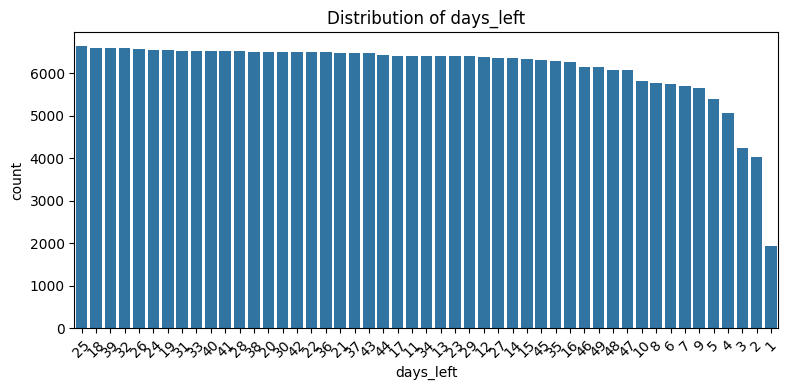

In [ ]:
col_continuous = ['duration', 'days_left', 'price']
col_discrete   = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

def univariate_discrete_analysis(df, col_discrete):
    for col in col_discrete:
        print(f'### analysing column : {col} ###')
        count = df[col].value_counts()
        display(count)

        plt.figure(figsize=(8,4))
        sns.countplot(data=df, x=col, order=count.index)

        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

def univariate_continuous_analysis(df, col_continuous):
    for col in col_continuous:
        print(f'### analysing column : {col} ###')
        stats = df[col].describe()
        variance = df[col].var()

        display(stats)
        print(f'Variance: {variance:.2f}')

        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        
        #histogram
        sns.histplot(df[col], kde=True, ax=axes[0])
        axes[0].set_title(f'Histogram of {col}')
        
        #boxplot
        sns.boxplot(x=df[col], ax=axes[1])
        axes[1].set_title(f'Boxplot of {col}')

        plt.tight_layout()
        plt.show()


    
univariate_discrete_analysis(df, col_discrete)
